# Lecture 13 : Data Visualization (Part 1)

# Data Science, DST, UIC

# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its ability to **play well with many operating systems and graphics backends**. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

## Table of content of this chapter:
 - Introduction to Matplotlib 
 - Figure and Axes 
 - Simple line plots
 - Simple scatter plots
 - Density and Contour Plots

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [2]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.

In [3]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` will display all figures and this command should be used *only once* per Python script, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell.
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

In a notebook, we need to use ``%matplotlib inline`` before we can plot any figures:

In [4]:
%matplotlib inline 

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:
- ``plt.figure(num=None,figsize=None)``, create a new figure. 
    * num: integer or string, optional, default: None If not provided, a new figure will be created, and the figure number will be incremented. The figure objects holds this number in a `number` attribute. If num is provided, and a figure with this id already exists, make it active, and returns a reference to it. If this figure does not exists, create it and returns it. If num is a string, the window title will be set to this figure's `num`.
    * figsize : tuple of integers, optional, default: None. Width, height in inches. If not provided, defaults to ``[6.4, 4.8]``.
- ``plt.plot(x,y,formatstring， **kwargs)``, plot y versus x as lines and/or markers.
 * ``formatstring``: is a convenient way for defining basic formatting like color, marker and linestyle, e.g., 'bo': blue circle; 'r+':red plusses.
 * keyword arguments: ``linewidth``, ``markersize``, ``linestyle``, etc.

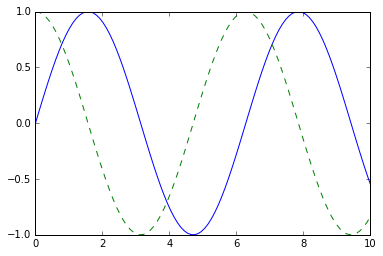

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)
fig = plt.figure()
# fig = plt.figure(2,(10,10)) # create a new figure
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
# fig.number

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [6]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

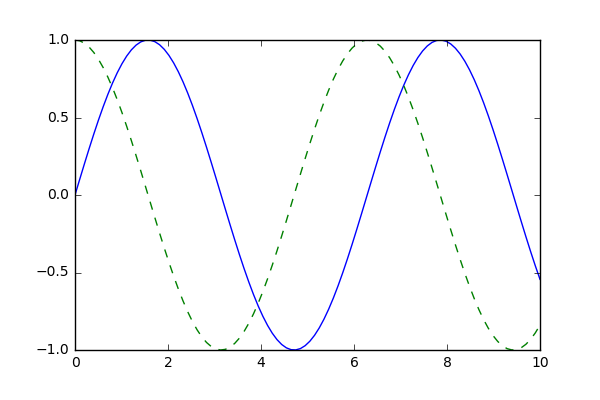

In [7]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [8]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

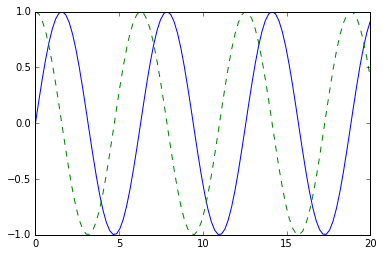

In [9]:
x = np.linspace(0, 20, 100)
fig = plt.figure() # create a new figure
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
# fig = plt.figure(2)
plt.savefig("my_figure1.jpeg") # save the current figure

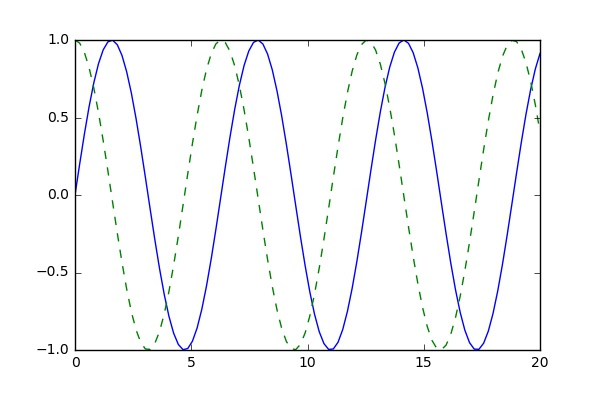

In [10]:
Image("my_figure1.jpeg")

## Figure and Axes

In Matplotlib, the **figure** (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The **axes** (an instance of the class plt.Axes) is a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. We'll commonly use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances.
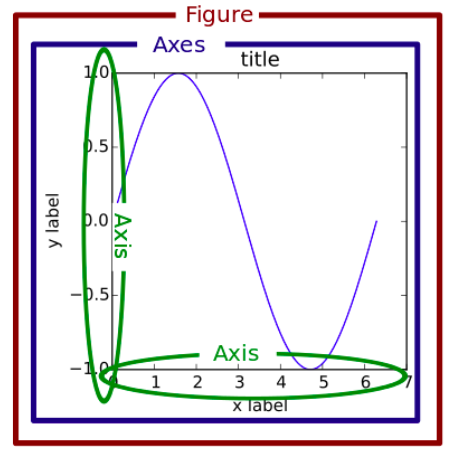

The first call to ``plt.plot`` will automatically create the necessary figure and axes to achieve the desired plot. Subsequent calls to ``plt.plot`` re-use the current axes and each add another line. Setting the title, legend, and axis labels also automatically use the current axes and set the title, create the legend, and label the axis respectively.

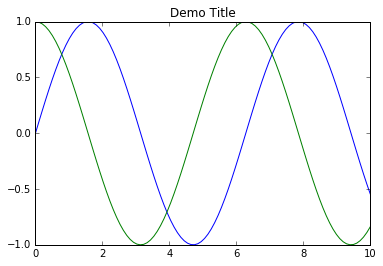

In [11]:
x = np.linspace(0, 10, 100);

plt.plot(x, np.sin(x));
plt.plot(x, np.cos(x));
plt.title("Demo Title");

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

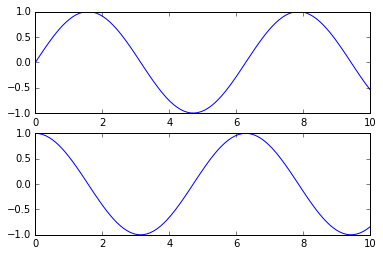

In [12]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axes
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));


While this interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

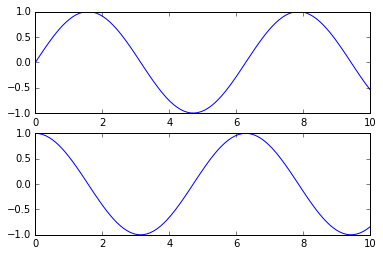

In [13]:
# Create a figure and a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
# Call plot() method on the appropriate object

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

``plt.subplots(rows=1,cols=1)``
 - Create a full rows*cols grid of subplots, returning them in a NumPy array. 
 - The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

In the following example, we create a  2×3 grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

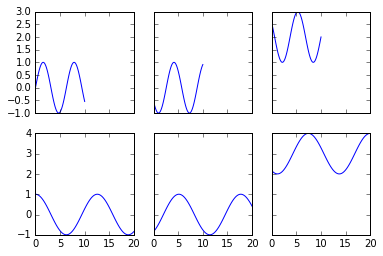

In [14]:
fig, ax = plt.subplots(2, 3,sharex='col', sharey='row') 
x = np.linspace(0,10,100)
y = np.linspace(0,20,100)
ax[0][0].plot(x,np.sin(x));
ax[0][1].plot(x,np.sin(x+10));
ax[0][2].plot(x,np.sin(x-10)+2);
ax[1][0].plot(y,np.cos(x));
ax[1][1].plot(y,np.cos(x+10));
ax[1][2].plot(y,np.cos(x-10)+3);

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes. Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

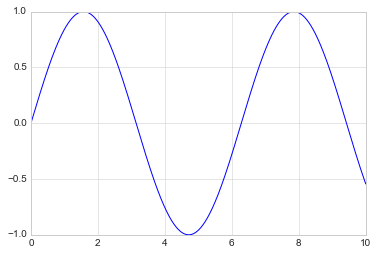

In [16]:
fig = plt.figure() # create a figure
ax = fig.add_subplot(1,1,1) # create an axes 
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

or we can do the same thing using the following syntax:

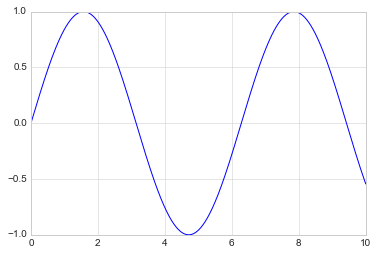

In [17]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times (in same cell):

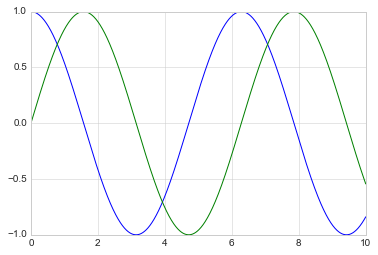

In [18]:
plt.plot(x, np.cos(x));
plt.plot(x,np.sin(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color (https://matplotlib.org/3.1.0/gallery/color/named_colors.html ).
The color can be specified in a variety of ways:

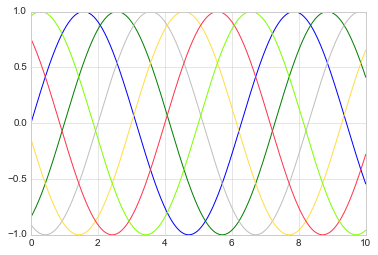

In [19]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

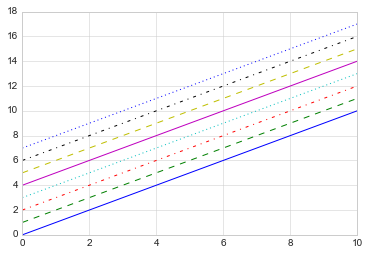

In [20]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

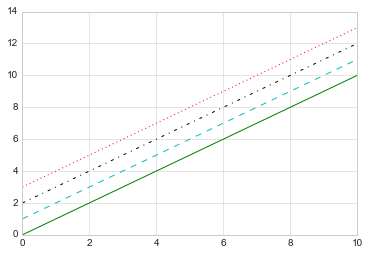

In [21]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot()`` function using IPython's help tools (See [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

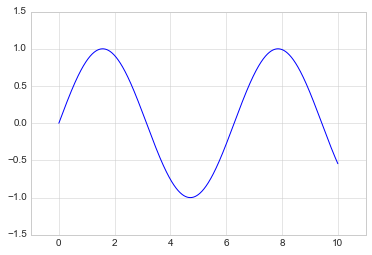

In [22]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

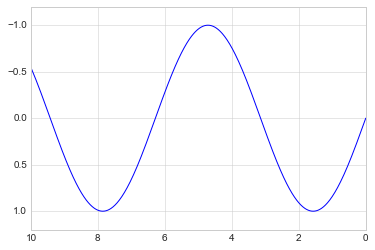

In [23]:
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is ``plt.axis()`` .
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

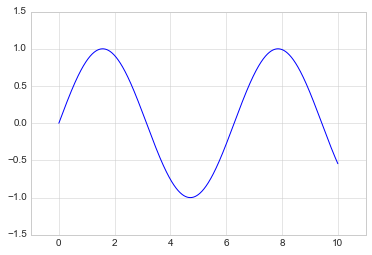

In [24]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

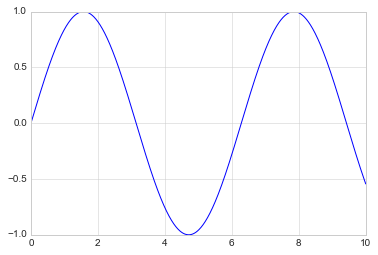

In [25]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

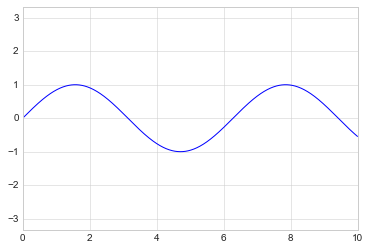

In [26]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

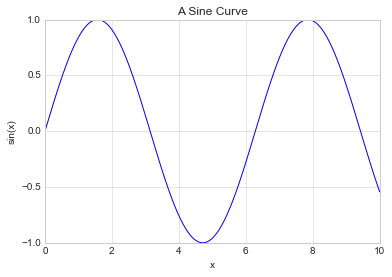

In [27]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

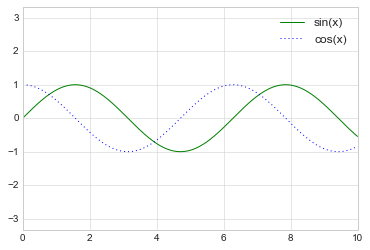

In [28]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring; additionally, we will cover some more advanced legend options later.

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

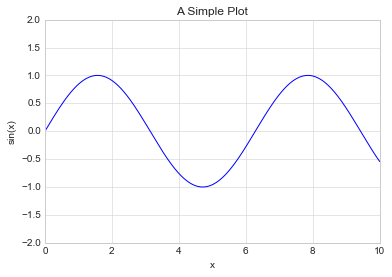

In [29]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

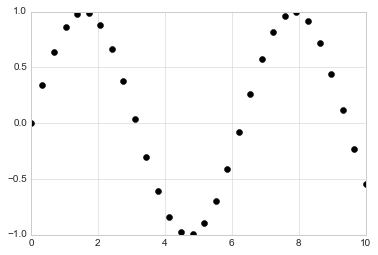

In [31]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

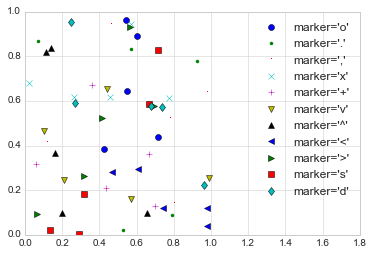

In [32]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

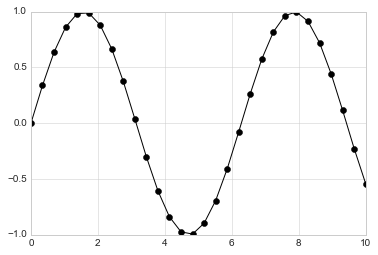

In [33]:
plt.plot(x, y, '-ok');

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

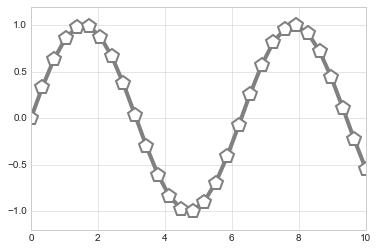

In [34]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

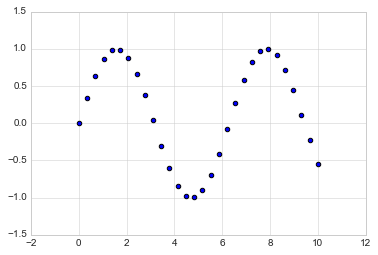

In [35]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

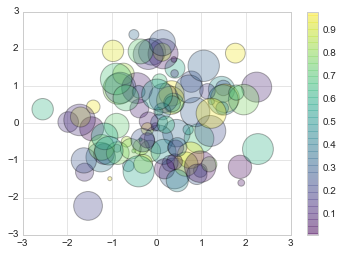

In [36]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')# A sequence of n numbers to be mapped to colors using *cmap* 
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
features.shape

(4, 150)

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length/width, stored in a 4*150 numpy.ndarray

The columns being the samples and the rows being: Sepal Length, Sepal Width, Petal Length and Petal Width.

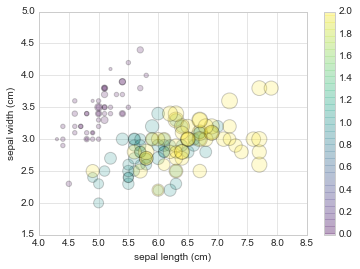

In [38]:

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.colorbar();
#iris.target is the species of flower

Refer to https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for more color maps.

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

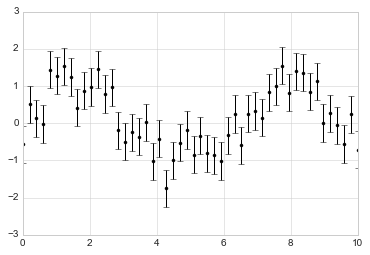

In [40]:
x = np.linspace(0, 10, 50)
dy = 0.5
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``.

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

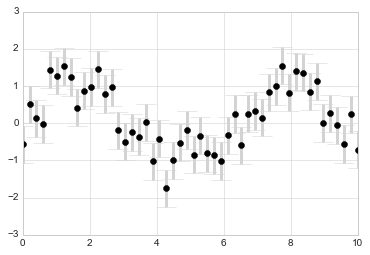

In [41]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=10);

In [42]:
plt.errorbar?

In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$, when we used it as a motivating example for array broadcasting):

In [44]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of x values, a grid of y values, and a grid of z values.
The x and y values represent positions on the plot, and the z values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

[[1 2]
 [1 2]
 [1 2]]
[[2 2]
 [3 3]
 [4 4]]


(1, 5)

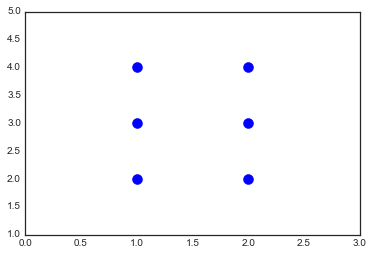

In [45]:
x=[1,2]
y=[2,3,4]
X,Y = np.meshgrid(x,y) # shape is size(y)*size(x)
print(X)
print(Y)
plt.plot(X,Y,'.b', markersize='20')

plt.xlim([0,3])
plt.ylim([1,5])

In [46]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors.
Z = f(X, Y)
Z.shape

(40, 50)

Now let's look at this with a standard line-only contour plot:

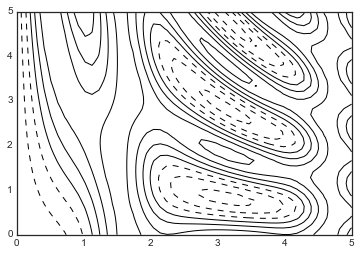

In [47]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range. Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

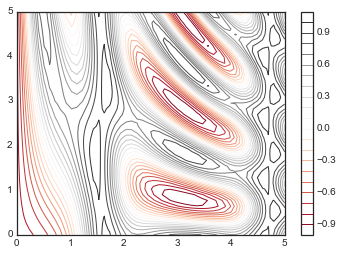

In [48]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

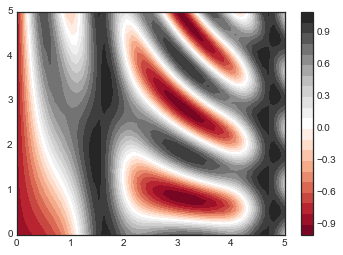

In [49]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

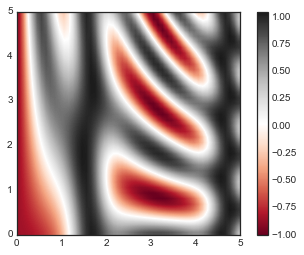

In [50]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an x and y grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

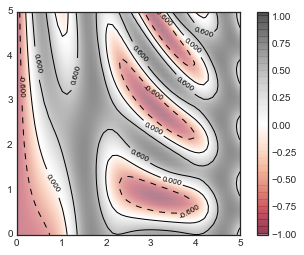

In [51]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.